# Nino 3 index
Calculate Nino 3 index from sea surface temperature data.

In [40]:
import xarray as xr
import matplotlib.pyplot as plt

We will use the NOAA Extended Reconstructed Sea Surface Temperature (ERSST) v5 product.

In [53]:
file = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(file, drop_variables=['time_bnds'])
ds = ds.sel(time=slice('1979', '2024')).load() # select data only from 1979 to 2023
sst = ds.sst
ds.time

<xarray.DataArray 'time' (time: 550)>
array(['1979-01-01T00:00:00.000000000', '1979-02-01T00:00:00.000000000',
       '1979-03-01T00:00:00.000000000', ..., '2024-08-01T00:00:00.000000000',
       '2024-09-01T00:00:00.000000000', '2024-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2024-10-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-07 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [19723. 82088.]
    _ChunkSizes:      1

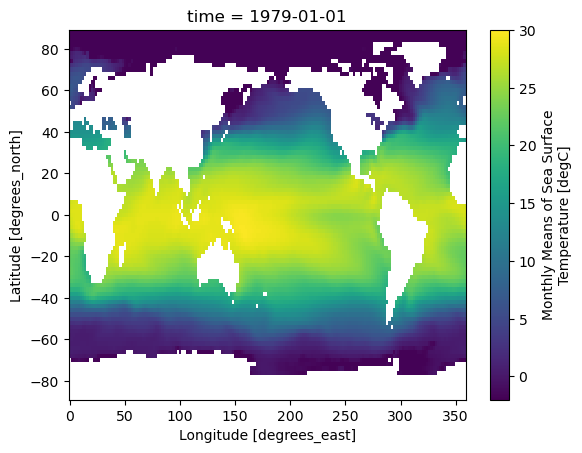

In [34]:
#plot the first time step.
sst.isel(time=0).plot(vmin=-2, vmax=30)

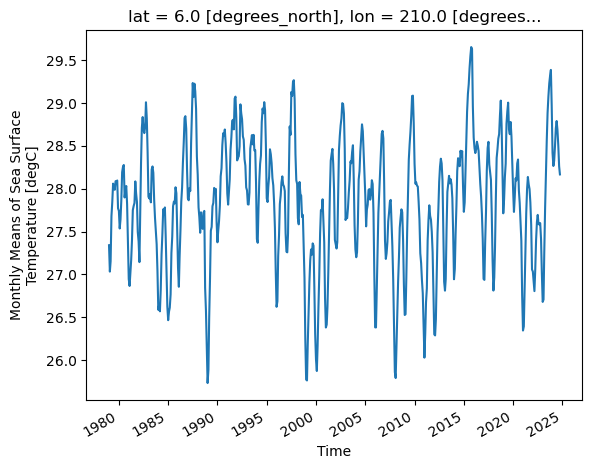

In [35]:
sst.sel(lon=210, lat=5, method="nearest").plot()

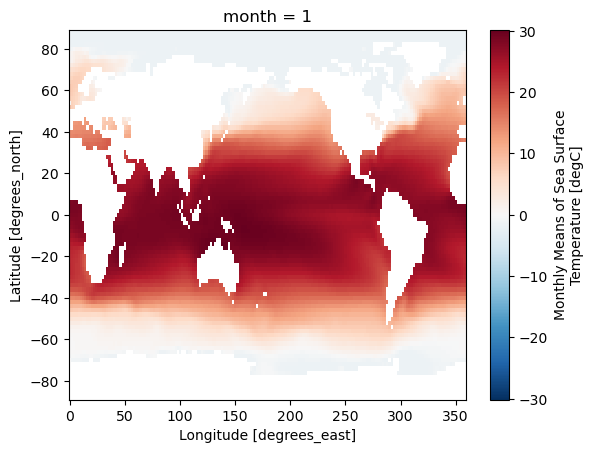

In [81]:
# calculate climatological mean
sst_clim=sst.groupby("time.month").mean(dim="time")
# plot January mean
sst_clim.isel(month=0).plot()

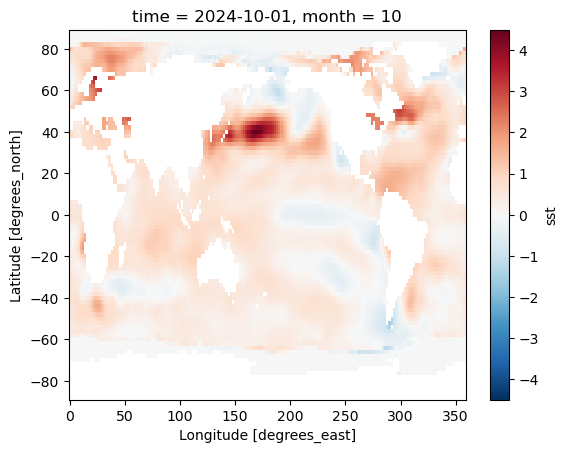

In [82]:
sst_anom = sst.groupby("time.month") - sst_clim
sst_anom.isel(time=-1).plot() # SST anomaly last month

In [75]:
# SST average in the Nino 3 region
sst_nino3=sst_anom.sel(lat=slice(5,-5),lon=slice(210,270)).mean(("lat","lon"))

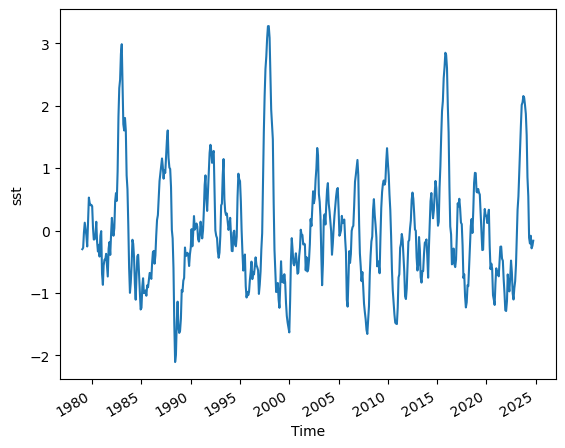

In [76]:
sst_nino3.plot()

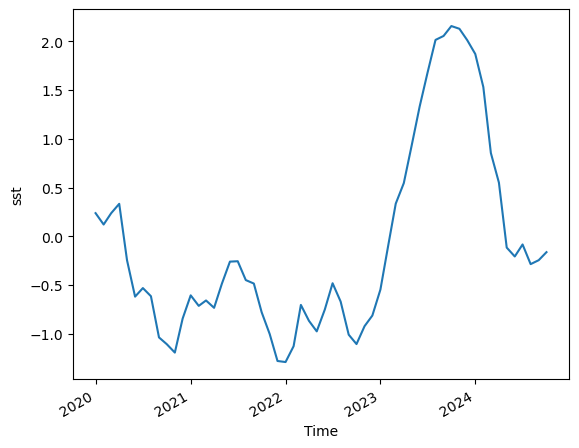

In [78]:
nino3.sel(time=slice('2020', '2024')).plot()  #plot only between 2020 to 2024

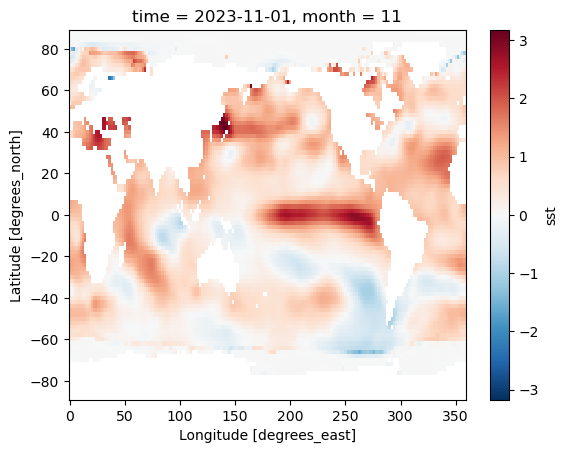

In [79]:
sst_anom.sel(time="2023-11").plot()